# Week 2b: Intro to Signal Processing

In [13]:
%load_ext autoreload
%autoreload 2

import csv
import matplotlib.pyplot as plt
import numpy as np

from biosppy import tools as biosppy_tools
from scipy import signal

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In the last module, we tried graphing EEG data from the Muse headband ... and it was noisy! :( Don't worry though! In this module, we'll learn how to remove the noise with a library called ***biosppy***. Before we do that, we need to load data! Try loading data from `./data/stare_blink/csv` into 4 lists: 1 for each electrode on the Muse! Then graph each list into its own subplot on a MatPlotLib figure :)

In [2]:
# Saving Muse EEG values in list: one for each electrode
l_ear_arr = []
l_forehead_arr = []
r_forehead_arr = []
r_ear_arr = []

with open('./data/stare_blink.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        l_ear = float(row['l_ear'])
        l_forehead = float(row['l_forehead'])
        r_forehead = float(row['r_forehead'])
        r_ear = float(row['r_ear'])
        
        l_ear_arr.append(l_ear)
        l_forehead_arr.append(l_forehead)
        r_forehead_arr.append(r_forehead)
        r_ear_arr.append(r_ear)

c:\miniconda\envs\muse-env\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


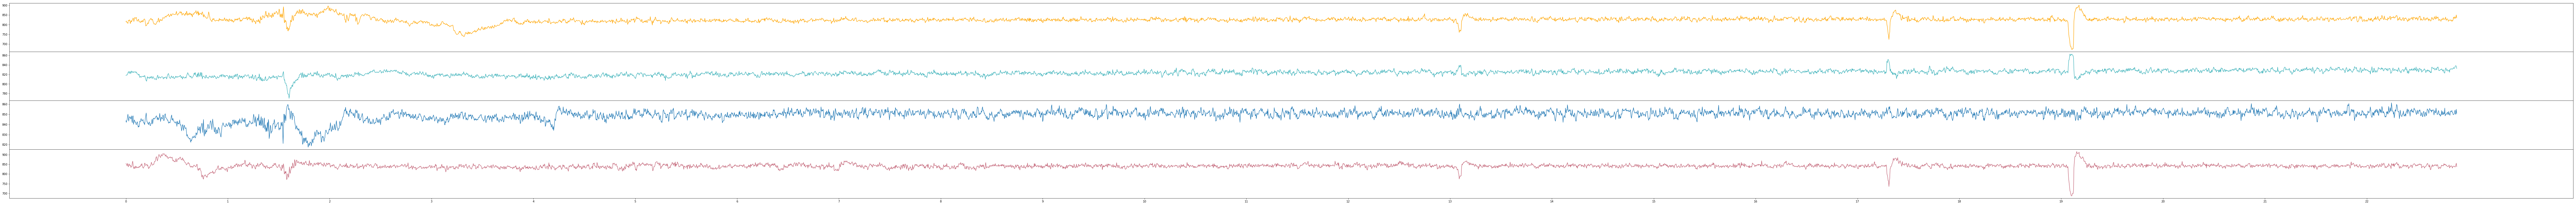

In [3]:
def plot_muse(l_ear_arr, l_forehead_arr, r_forehead_arr, r_ear_arr):
    t = [i / 256.0 for i in range(0, len(l_ear_arr))]

    plt.rcParams['figure.figsize'] = [140, 12]

    fig = plt.figure()

    l_ear_ax =      fig.add_axes([0.1, 0.7, 0.9, 0.2])
    l_forehead_ax = fig.add_axes([0.1, 0.5, 0.9, 0.2])
    r_forehead_ax = fig.add_axes([0.1, 0.3, 0.9, 0.2])
    r_ear_ax =      fig.add_axes([0.1, 0.1, 0.9, 0.2])

    l_ear_ax.plot(t, l_ear_arr, color='#FFA500')
    l_forehead_ax.plot(t, l_forehead_arr, color='#3CB2BA')
    r_forehead_ax.plot(t, r_forehead_arr)
    r_ear_ax.plot(t, r_ear_arr, color='#C46679')

    plt.xticks(np.arange(t[0], t[-1], 1.0))

    fig.show()

plot_muse(l_ear_arr, l_forehead_arr, r_forehead_arr, r_ear_arr)

First of all, what exactly is EEG? EEG is a measure of the electrical activity that goes on inside your brain, and the Muse acts as a voltmeter to pick up your brain's voltages. But electricity is a ***field*** and is made of 'waves', so it propogates through space, just like sound waves through air.

What does this mean? Well, for a start, your laptop, the lights in this room, literally everything that runs on electricity is creating an electric field! Specifically, these electric fields *oscillate* at 60 times per second, or 60 **hertz** (Hz). So in your recording, you'll notice a *component* of the EEG oscillating at 60Hz!

Note that actual EEG we are interested in analyzing rarely goes above 59Hz, so we can just remove any signal above 59Hz! You can do that like this:

```
b, a = biosppy_tools.get_filter(
                ftype='FIR',
                band='lowpass',
                order=8,
                frequency=59.0,
                sampling_rate=256.0)

filtered_data, _ = biosppy_tools._filter_signal(b, a,
                                                signal=data,
                                                check_phase=True,
                                                axis=0)
```

Try it out, and see what happens! :D

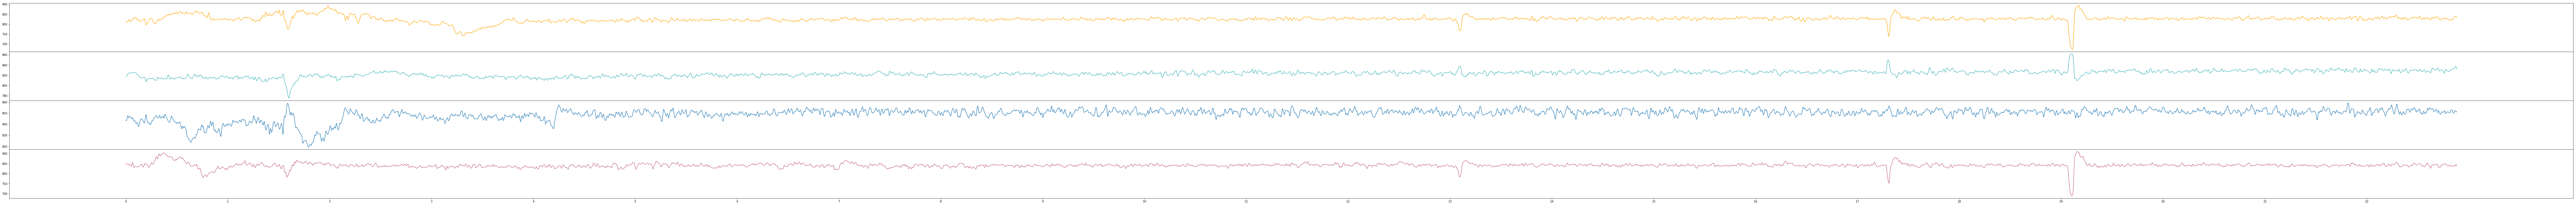

In [4]:
def lowpass_forty_hz(data):
    b, a = biosppy_tools.get_filter(
                    ftype='FIR',
                    band='lowpass',
                    order=8,
                    frequency=59.0,
                    sampling_rate=256.0)

    filtered_data, _ = biosppy_tools._filter_signal(b, a,
                                                    signal=data,
                                                    check_phase=True,
                                                    axis=0)
    return filtered_data

l_ear_filt = lowpass_forty_hz(l_ear_arr)
l_forehead_filt = lowpass_forty_hz(l_forehead_arr)
r_forehead_filt = lowpass_forty_hz(r_forehead_arr)
r_ear_filt = lowpass_forty_hz(r_ear_arr)

plot_muse(l_ear_filt, l_forehead_filt, r_forehead_filt, r_ear_filt)

That looks pretty good, but we can do better! Note that the 0Hz component is the same as a sine wave with a period of 1/0 seconds ... pretty much a straight line! Essentially the 0Hz component shifts the graph up and down. We really don't care about that either ... so let's try removing it!

A really simple way of removing the DC component is subtracting the average of the entire signal! You can use the **numpy** library to do this; try it yourself!

**Note: The numpy library has been abbreviated to 'np' in the import statement:**

`import numpy as np`

*Hint: try using np.subtract() and np.mean() :)*

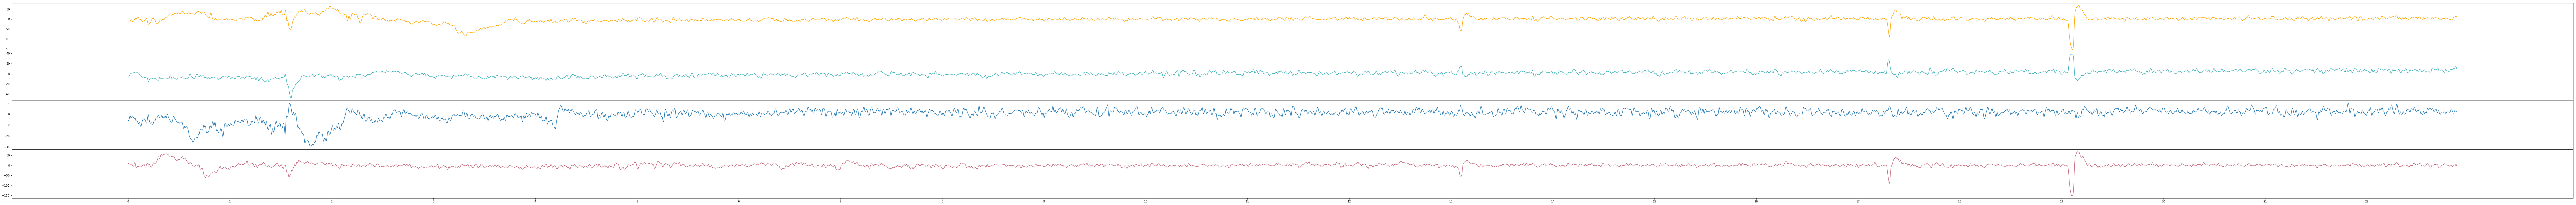

In [5]:
l_ear_filt = np.subtract(l_ear_filt,np.mean(l_ear_filt))
l_forehead_filt = np.subtract(l_forehead_filt,np.mean(l_forehead_filt))
r_forehead_filt = np.subtract(r_forehead_filt,np.mean(r_forehead_filt))
r_ear_filt = np.subtract(r_ear_filt,np.mean(r_ear_filt))

plot_muse(l_ear_filt, l_forehead_filt, r_forehead_filt, r_ear_filt)

Woah ... that worked like **magic**!! In fact, what do we even mean when we say there is a 60Hz component in the EEG? It has to do with *breaking down the function into easier to understand parts.* Let's do some exploring to find out more!

Try graphing $y=sin(x)$ using MatPlotLib for $x={-2\pi...2\pi}$. Use ***np.pi*** and ***np.linspace*** to make a bunch of x values, and ***np.sin*** for the sine:

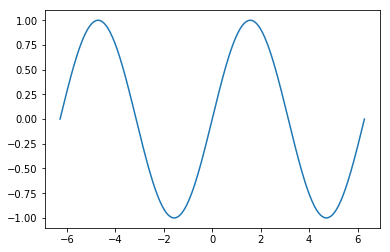

In [4]:
x = np.linspace(-2*np.pi, 2*np.pi, 401)
plt.plot(x, np.sin(x))

Now try adding two sines! Graph $y=sin(x) + sin(2x)$ for $x={-2\pi...2\pi}$. What do you notice?

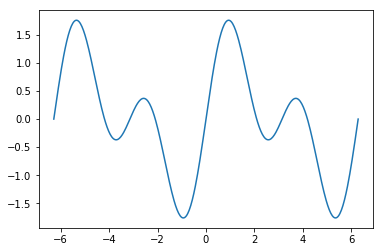

In [5]:
x = np.linspace(-2*np.pi, 2*np.pi, 401)
plt.plot(x, np.sin(x) + np.sin(2*x))

Notice how the graph gets more complex? Have some fun with it! Try the sin of $2x+\pi$ instead of just $2x$ ... or $2(x+2)$ ... or add more things ... or do whatever you want! **Go wild, explore :)**

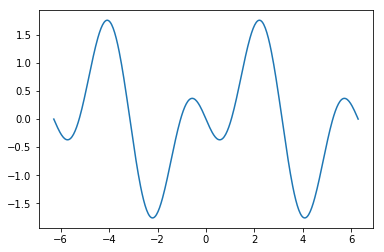

In [11]:
x = np.linspace(-2*np.pi, 2*np.pi, 401)
plt.plot(x, np.sin(x) + np.sin(2*(x + np.pi/2)))

A bit of backtracking though ... why are we exploring sines and cosines in the first place? There's actually another way of breaking down functions with *polynomials* called the Taylor Series (AP / first year calc anyone?) But here's a slight issue: polynomials don't tell us much about the brain! The brain often *oscillates* at frequencies that tells us a lot about the brain, but polynomials can't give us this information! Neither do they tell us much about oscillations in general. We can easily describe AC (alternating current) electricity as a sinusoidal wave oscillating at 60Hz, but it's a lot harder to describe AC electricity as polynomials!

No worries though! We can do the same approximation trick ... but with ***sines and cosines*** instead!

Try approximating this function with sines and cosines. (It doesn't have to be perfect, but play around with it :) )

```
f(x) = 0 if floor(x) is odd; 1 if floor(x) is even
```

(-2, 2)

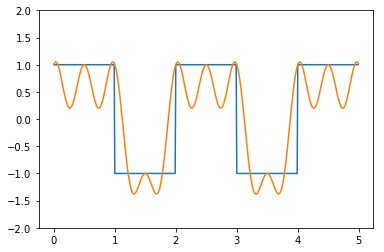

In [54]:
t = np.linspace(0, 5, 500, endpoint=False)
plt.plot(t, signal.square(np.pi * t))
plt.plot(t, np.sin(np.pi*t) + 0.5*np.sin(2*np.pi*t + np.pi / 2) + 0.5*np.sin(4*np.pi*t + np.pi / 2))
plt.ylim(-2, 2)

There's actually a method to finding the approximation of a function using sines and cosines called the **Fourier series**! With an infinite number of sines and cosines, you can perfectly approximate any periodic function! You can also graph the wave as a function of time. However, sine waves are ***periodic***, so a sine wave behaves the same way over time. Theoretically, you can make a graph, but instead of having a time axis and an amplitude axis, you could have a *frequency* axis and an amplitude axis. Each frequency represents a sine / cosine wave (with an amplitude) *added* to the final function, which will approximate the wave! You could get something like this:

In [55]:
from IPython.display import HTML

# Youtube video showing how Taylor series works :D
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/r4c9ojz6hJg" frameborder="0" allowfullscreen></iframe>')


c:\miniconda\envs\muse-env\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


And here it is: the ***Fourier Transform***. Because sines and cosines are periodic, you can *change* between ***time domain*** (time vs amplitude) and ***frequency domain*** (frequency of sines in sum, vs amplitudes of sines in sum). Visualizing the frequency domain is super-useful because we can look at sources of noise, and also what's happening inside the brain!

Let's try coding a function that calculates the Fourier Transform of a function! 

(We'll use the *Discrete Time Fourier Transform* method. DTFTs are rarely used in rare life; the *Fast Fourier Transform* achieves the same result but is far more efficient because it takes advantage of calculations that have already been done. Read up on *dynamic programming* if you're interested in that :))) )

First, let's introduce a simple but important concept: **the dot product** : (note that $x$ and $y$ are in N-dimensional space)

$$x \cdot y = \sum_{i=0}^{N} x_{i}y_{i}$$

(*You might have seen this formular applied to 2D space like this:)*
$$x \cdot y = ||x|| ||y|| cos \theta$$

Essentially, the dot product of two vectors $x$ and $y$ gives a vector $z$ which is a *projection of $x$ on $y$:* how much of $x$ do you need to make $y$?

![Dot product](./../resources/dot-product.png)
Cohen M. (2014). *Analyzing Neural Time Series Data*.

Try it yourself! Compute the dot product of vectors $x=[0, 1, 2]$ and $y=[1, 0, 0]$ without using numpy or things like that. What do you get?

In [6]:
x = [0, 1, 2]
y = [1, 0, 0]

# Sum over _____
    # and multiply _____